- Linear Regression: 
    - http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb
    - 데이타 받기
        - https://github.com/emilmont/Artificial-Intelligence-and-Machine-Learning/blob/master/ML/ex1/ex1data1.txt
        - https://github.com/emilmont/Artificial-Intelligence-and-Machine-Learning/blob/master/ML/ex1/ex1data2.txt
        - (오른쪽 상단의 Raw에서 우클릭 후 내려받기 수행)
- Logistic Regression:
    - http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise2.ipynb
    - 데이타 받기
        - https://github.com/emilmont/Artificial-Intelligence-and-Machine-Learning/blob/master/ML/ex2/ex2data1.txt
        - https://github.com/emilmont/Artificial-Intelligence-and-Machine-Learning/blob/master/ML/ex2/ex2data2.txt
        - (오른쪽 상단의 Raw에서 우클릭 후 내려받기 수행)
- K-means Clustering & PCA
    - http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise7.ipynb
    - 데이타 받기
        - https://github.com/emilmont/Artificial-Intelligence-and-Machine-Learning/tree/master/ML/ex7
        - (해당 파일 클릭 후, 오른쪽 상단의 Raw에서 우클릭 후 내려받기 수행)

In [1]:
%autosave 0
# notebook 명령어 - 실행한 브라우저에서 바로 그림을 보여줌
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Autosave disabled


In [2]:
import os
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


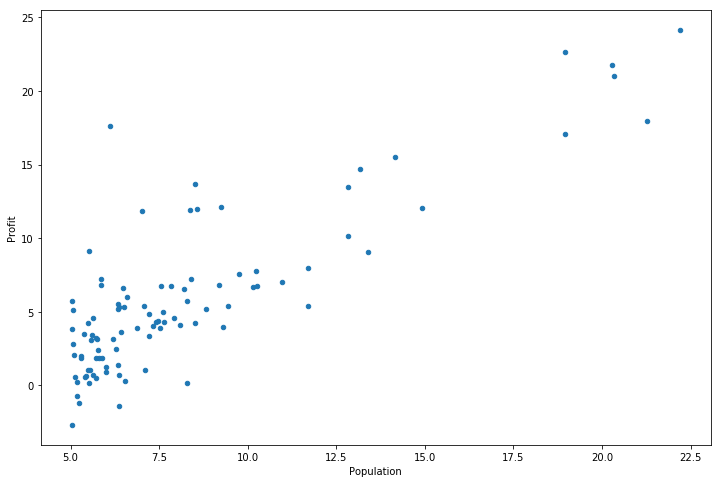

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Gradient Descent(경사 하강)을 이용해 Cost Function을 최소화하는 Linear Regression(선형회귀)을 구현

주어진 솔루션의 Cost를 계산하는 함수를 생서 (θ로 특징지어짐)

In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Train set에 0열 추가하여 Cost 및 Gradient Descent 계산에 벡터를 사용가능하게 함

In [6]:
data.insert(0,'Ones', 1)

In [7]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


변수 초기화
- X(Training Data), y(Target Variable)

In [8]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [9]:
print(cols)

3


Training Data

In [10]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


Target(Label) Data

In [11]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Cost Function은 numpy 행렬을 활용하므로 X, y를 사용전에 변환해야함

In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [13]:
theta

matrix([[0, 0]])

In [14]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

θ가 0이 되는 값 계산

In [15]:
computeCost(X, y, theta)

32.072733877455676

θ에 Gradient Descent를 수행하는 함수 정의

In [16]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    # ravel 함수 = 연속 병합 배열 반환
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

learning rate α와 반복횟수 설정

In [17]:
alpha = 0.01
iters = 1000

GD를 실행하여 θ를 fitting

In [18]:
gd, cost = gradientDescent(X, y, theta, alpha, iters)
gd

matrix([[-3.24140214,  1.1272942 ]])

피팅된 결과를 사용해서 학습모델의 Cost(error) 계산

In [19]:
computeCost(X, y, gd)

4.5159555030789118

선형 모델과 데이터를 시각화하여 비교

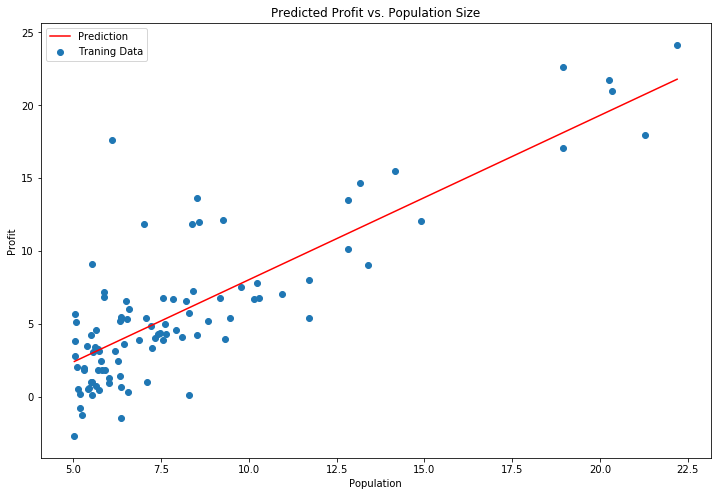

In [20]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = gd[0, 0] + (gd[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

GD는 반복마다 결과로 벡터를 반환하므로 Plotting 가능. Cost는 항상 감소함

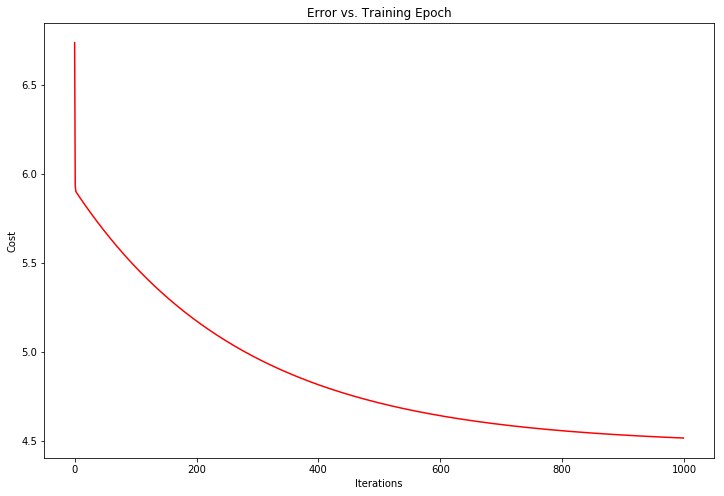

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Linear regression with multiple variables

In [22]:
path2 = os.getcwd() + '/data/ex1data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


pandas를 이용해서 feature의 정규화 작업을 추가

In [24]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [25]:
data2.insert(0, 'Ones', 1)

# X (training data) / y (Target[label] variable)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

# 행렬 변환 및 θ초기화
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

# 선형회귀 수행
gd2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# 모델의 Cost(error) 측정
computeCost(X2, y2, gd2)

0.13070336960771892

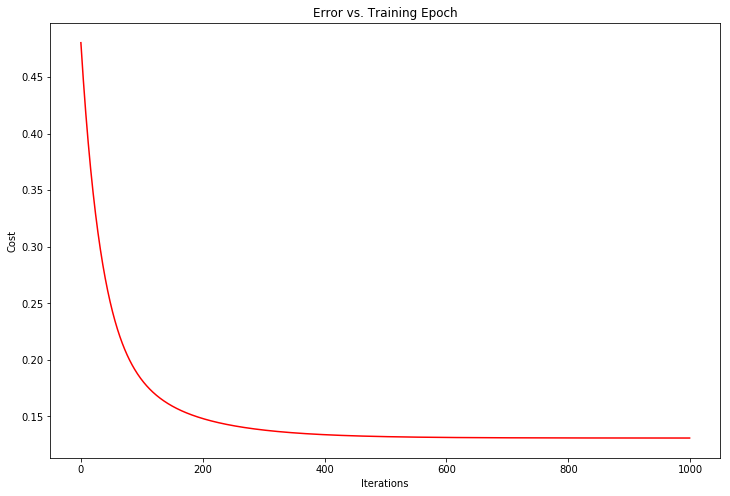

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

scikit-learn의 선형 회귀 함수를 사용

In [27]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

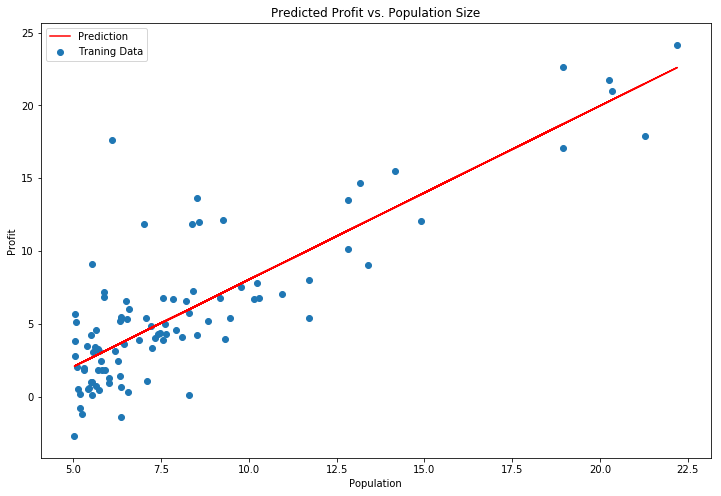

In [28]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')